In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sn
%matplotlib inline

In [2]:
df = pd.read_csv("HistoricalQuotes.csv")

In [3]:
df['date']= pd.to_datetime(df['date'])
df['Year']= df['date'].apply((lambda x: x.strftime("%Y")))
df['Month']= df['date'].apply((lambda x: x.strftime("%b")))

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 8 columns):
date      507 non-null datetime64[ns]
close     507 non-null float64
volume    507 non-null object
open      507 non-null float64
high      507 non-null float64
low       507 non-null float64
Year      507 non-null object
Month     507 non-null object
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 31.8+ KB


In [9]:
df.head()


,date,close,volume,open,high,low,Year,Month
0,2018-02-18 10:46:00,44.95,"13,033,017",43.970,44.97,43.790,2018,Feb
1,2018-02-15 00:00:00,44.08,72045260.0000,45.065,45.13,43.260,2018,Feb
2,2018-02-14 00:00:00,42.09,43187830.0000,41.040,42.26,40.990,2018,Feb
3,2018-02-13 00:00:00,41.23,29388340.0000,40.500,41.31,40.220,2018,Feb
4,2018-02-12 00:00:00,40.60,38095480.0000,40.515,40.91,40.225,2018,Feb


In [6]:
df2= df.groupby(["Year",'Month'])

In [7]:
df3= df2.get_group(("2018","Jan"))

In [14]:
df3

,date,close,volume,open,high,low,Year,Month
12,2018-01-31,41.54,36126300.0000,41.980,42.010,41.350,2018,Jan
13,2018-01-30,42.25,28710950.0000,42.685,42.860,41.970,2018,Jan
14,2018-01-29,42.85,23599980.0000,42.300,42.980,42.300,2018,Jan
15,2018-01-26,42.56,23351950.0000,42.150,42.560,41.950,2018,Jan
16,2018-01-25,41.90,19067170.0000,42.270,42.470,41.820,2018,Jan
17,2018-01-24,42.17,26636840.0000,42.200,42.685,42.010,2018,Jan
18,2018-01-23,42.10,23029880.0000,41.540,42.130,41.540,2018,Jan
19,2018-01-22,41.66,22841180.0000,41.200,41.660,41.020,2018,Jan
20,2018-01-19,41.29,24469260.0000,41.280,41.520,41.100,2018,Jan
21,2018-01-18,41.30,18237820.0000,41.240,41.480,41.030,2018,Jan


In [8]:
t1= df2.get_group(("2017","Jan"))['close'].iloc[-1]
t2=df2.get_group(("2017","Feb"))['close'].iloc[-1]
t3=df2.get_group(("2017","Mar"))['close'].iloc[-1]
t4=df2.get_group(("2017","Apr"))['close'].iloc[-1]
t5=df2.get_group(("2017","May"))['close'].iloc[-1]
t6=df2.get_group(("2017","Jun"))['close'].iloc[-1]
t7=df2.get_group(("2017","Jul"))['close'].iloc[-1]
t8=df2.get_group(("2017","Aug"))['close'].iloc[-1]

In [21]:
t9= df2.get_group(("2017","Jan"))[['close','date']].iloc[-1]
type(t9)



pandas.core.series.Series

In [9]:
Y=[t1,t2,t3,t4,t5,t6,t7,t8]
Y


[30.539999999999999,
 30.5,
 34.439999999999998,
 33.579999999999998,
 33.969999999999999,
 31.82,
 31.329999999999998,
 31.649999999999999]

In [23]:
target_year = "2017"
target_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep']  #8 months

In [25]:
observation = [
    (df2.get_group((target_year, month))['close'].iloc[-1])
    for month in target_months
    ]
observation

[30.539999999999999,
 30.5,
 34.439999999999998,
 33.579999999999998,
 33.969999999999999,
 31.82,
 31.329999999999998,
 31.649999999999999,
 32.299999999999997]

In [26]:
forecast =  [30.539999999999999, 30.539999999999999, 30.532000000000004, 31.313600000000001, 31.766880000000004, 32.207504, 32.130003200000004, 31.970002560000005, 31.906002048000005]

type(observation)

list

In [27]:
new_df2 = pd.DataFrame()

new_df2['F']=pd.Series(forecast)
new_df2['X']= pd.Series(observation)
new_df2['Date']= pd.Series(target_months)

In [28]:
new_df2.index= new_df2['Date']
new_df2.head(10)



,F,X,Date
Date,,,
Jan,30.540000,30.54,Jan
Feb,30.540000,30.50,Feb
Mar,30.532000,34.44,Mar
Apr,31.313600,33.58,Apr
May,31.766880,33.97,May
Jun,32.207504,31.82,Jun
Jul,32.130003,31.33,Jul
Aug,31.970003,31.65,Aug
Sep,31.906002,32.30,Sep


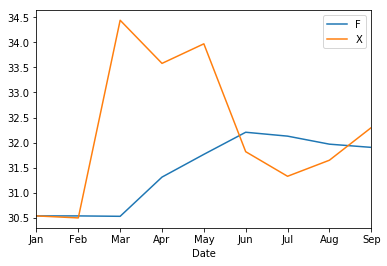

In [30]:
melted= pd.melt(new_df2,id_vars='Date',value_vars=['X','F'])
new_df2.plot()

[4, 10]

In [24]:
x=1

In [25]:
0<=x<=1

True

In [26]:
x==1

True

In [28]:
type(1)

int

In [30]:
ll = []
ll.extend([1,2])
ll

[1, 2]